In [21]:
import pandas as pd
import seaborn as sns
import numpy  as np
import matplotlib.pyplot as plt

#load dataset
df=pd.read_csv('weather.csv')

#handle null and duplicate values
#there is no duplicate and null values
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14,73,9.5,82,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39,96,8.5,71,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30,64,7.0,16,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38,83,1.5,82,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27,74,17.0,66,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10,74,14.5,71,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1,76,3.5,23,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30,77,5.5,28,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3,76,10.0,94,overcast,984.27,0,Winter,2.0,inland,Snowy


In [22]:
#outliers treatment
from scipy import stats

numeric_col=df.select_dtypes(include='number').columns
z_score=np.abs(stats.zscore(df[numeric_col]))
outliers_mask = (z_score > 3).any(axis=1)

df_outlier=df[outliers_mask]

#remove the outlier

df=df.drop(df_outlier.index)
df.shape

(12151, 11)

In [23]:
#scaling
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
df[numeric_col]=scaler.fit_transform(df[numeric_col])
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,0.406250,0.595506,0.311475,0.752294,partly cloudy,0.525324,0.142857,Winter,0.225806,inland,Rainy
1,0.666667,0.853933,0.278689,0.651376,partly cloudy,0.528073,0.500000,Spring,0.645161,inland,Cloudy
2,0.572917,0.494382,0.229508,0.146789,clear,0.560923,0.357143,Spring,0.354839,mountain,Sunny
3,0.656250,0.707865,0.049180,0.752294,clear,0.594854,0.500000,Spring,0.064516,coastal,Sunny
4,0.541667,0.606742,0.557377,0.605505,overcast,0.434526,0.071429,Winter,0.161290,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,0.364583,0.606742,0.475410,0.651376,overcast,0.490762,0.071429,Summer,0.064516,mountain,Rainy
13196,0.250000,0.629213,0.114754,0.211009,cloudy,0.779515,0.071429,Winter,0.387097,coastal,Snowy
13197,0.572917,0.640449,0.180328,0.256881,overcast,0.533751,0.214286,Autumn,0.580645,coastal,Cloudy
13198,0.291667,0.629213,0.327869,0.862385,overcast,0.405687,0.000000,Winter,0.129032,inland,Snowy


In [24]:
#feature selection (anova==>numeric - object)
from sklearn.feature_selection import SelectKBest,chi2,f_classif
x=df.drop('Weather Type',axis=1)
y=df['Weather Type']

numeric_col_x=x.select_dtypes(include='number').columns

selector=SelectKBest(f_classif,k=5)
selector.fit(x[numeric_col_x],y)
x_anova=df[x.columns[selector.get_support(indices=True)]]
x_anova

,Temperature,Humidity,Precipitation (%),Atmospheric Pressure,UV Index
0,0.406250,0.595506,0.752294,0.525324,0.142857
1,0.666667,0.853933,0.651376,0.528073,0.500000
2,0.572917,0.494382,0.146789,0.560923,0.357143
3,0.656250,0.707865,0.752294,0.594854,0.500000
4,0.541667,0.606742,0.605505,0.434526,0.071429
...,...,...,...,...,...
13195,0.364583,0.606742,0.651376,0.490762,0.071429
13196,0.250000,0.629213,0.211009,0.779515,0.071429
13197,0.572917,0.640449,0.256881,0.533751,0.214286
13198,0.291667,0.629213,0.862385,0.405687,0.000000


In [25]:
#label encoding
from sklearn.preprocessing import LabelEncoder

y_final=pd.DataFrame(LabelEncoder().fit_transform(y),columns=['Weather Type'])

x_final=pd.concat([x,y_final],axis=1)

object_col_x=x.select_dtypes(include='object').columns

for col in object_col_x:
  label_encoder=LabelEncoder()
  x[col]=label_encoder.fit_transform(x[col])

In [26]:
# feature selection (chi square==>object - object)

selector1=SelectKBest(chi2,k=2)

selector1.fit(x[object_col_x],y)
x_chi=x[x[object_col_x].columns[selector1.get_support(indices=True)]]


#final x
x_final=x_anova.join(x_chi)
x_final

,Temperature,Humidity,Precipitation (%),Atmospheric Pressure,UV Index,Cloud Cover,Season
0,0.406250,0.595506,0.752294,0.525324,0.142857,3,3
1,0.666667,0.853933,0.651376,0.528073,0.500000,3,1
2,0.572917,0.494382,0.146789,0.560923,0.357143,0,1
3,0.656250,0.707865,0.752294,0.594854,0.500000,0,1
4,0.541667,0.606742,0.605505,0.434526,0.071429,2,3
...,...,...,...,...,...,...,...
13195,0.364583,0.606742,0.651376,0.490762,0.071429,2,2
13196,0.250000,0.629213,0.211009,0.779515,0.071429,1,3
13197,0.572917,0.640449,0.256881,0.533751,0.214286,2,0
13198,0.291667,0.629213,0.862385,0.405687,0.000000,2,3


In [27]:
len(y_final)
y_final.shape

(12151, 1)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


✅ Accuracy: 88 %

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       648
           1       0.86      0.84      0.85       598
           2       0.94      0.96      0.95       599
           3       0.89      0.86      0.88       586

    accuracy                           0.88      2431
   macro avg       0.88      0.88      0.88      2431
weighted avg       0.88      0.88      0.88      2431



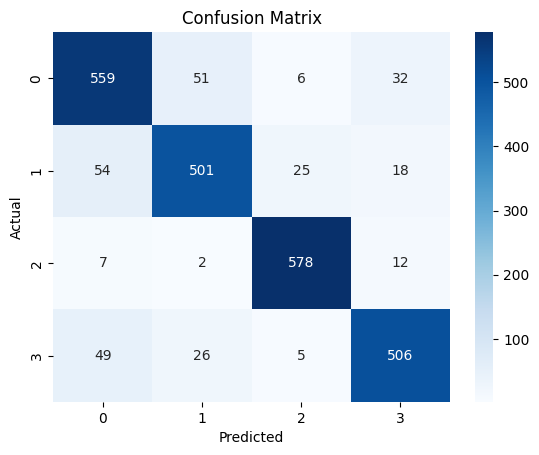

In [28]:
#model (logistic regression)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(x_final, y_final, test_size=0.2, random_state=42)

# 4. Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 5. Predict on test data
y_pred = model.predict(X_test)

# 6. Evaluate the model
print("✅ Accuracy:", int(accuracy_score(y_test, y_pred)*100),'%')
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# 7. Optional: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
